#### imports


In [33]:
%pip install requests
%pip install pandas openpyxl
%pip install scipy
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\alexa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\alexa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\alexa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\alexa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\alexa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [34]:
import pandas as pd

# Defina o caminho do arquivo com barras normais
caminho_arquivo = "C:/Users/alexa/OneDrive/Anexos/Fiap/projeto_fase4/Enterprise Challenge/data_analysis/data/dairy_dataset.csv"

# Carregar o arquivo Excel
df = pd.read_csv(caminho_arquivo)
df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [ ]:
df.describe()

In [ ]:
df_missing = df.isnull()
nulos_por_coluna = df_missing.sum()
print(nulos_por_coluna)

In [ ]:
import matplotlib.pyplot as plt

count = 1
for column in df.columns:
    
    # Verifique se a coluna contém valores numéricos
    if isinstance(df[column].iloc[0], (int, float)):
        plt.boxplot(df[column].dropna())  # Remova NaN para evitar erros no boxplot
        plt.title(f"Boxplot da coluna: {column}")
        plt.xlabel(column)
        plt.ylabel("Valores")
        print(plt.show())
    else:
        print('Coluna não numerico')
    count += 1


In [ ]:
print(df['Approx. Total Revenue(INR)'].describe())
print(df['Total Value'].describe())

### A)   Analisar a distribuição de vendas por produtos, categorias (vamos usar a brand) e regiões;

In [ ]:
# Como esse dataset não apresenta categoria, e todos os produtos são relacionados a comida iremos trocas a categoria pela marca do produto
# separando um df apenas com as colunas a serem analisadas

df_dist_venda = df[['Date','Location', 'Customer Location', 'Product Name', 'Brand', 'Quantity Sold (liters/kg)', 'Price per Unit (sold)','Approx. Total Revenue(INR)', 'Sales Channel' ]]

df_dist_venda.describe()
vendas_por_produto = df_dist_venda.groupby('Product Name')['Approx. Total Revenue(INR)'].sum().sort_values(ascending=False)

print("Vendas por Produto (Total em INR):")
print(vendas_por_produto)

# Visualização
import matplotlib.pyplot as plt

vendas_por_produto.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Produtos por Receita')
plt.xlabel('Produto')
plt.ylabel('Receita Total (INR)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
vendas_por_categoria = df_dist_venda.groupby('Brand')['Approx. Total Revenue(INR)'].sum().sort_values(ascending=False)

print("Vendas por Categoria (Marca):")
print(vendas_por_categoria)

# Visualização
vendas_por_categoria.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Distribuição de Vendas por Marca')
plt.ylabel('')
plt.show()


In [ ]:
# Vendas por Ponto de Venda
vendas_por_location = df_dist_venda.groupby('Location')['Approx. Total Revenue(INR)'].sum().sort_values(ascending=False)

print("Vendas por Ponto de Venda:")
print(vendas_por_location)

vendas_por_location.plot(kind='barh', figsize=(10, 6), color='lightgreen')
plt.title('Receita Total por Ponto de Venda')
plt.xlabel('Receita Total (INR)')
plt.ylabel('Localização')
plt.show()

# Vendas por Localização do Cliente
vendas_por_customer = df_dist_venda.groupby('Customer Location')['Approx. Total Revenue(INR)'].sum().sort_values(ascending=False)

print("Vendas por Localização do Cliente:")
print(vendas_por_customer)

vendas_por_customer.head(10).plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Top 10 Localizações de Clientes por Receita')
plt.xlabel('Localização do Cliente')
plt.ylabel('Receita Total (INR)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
vendas_por_canal = df_dist_venda.groupby('Sales Channel')['Approx. Total Revenue(INR)'].sum().sort_values(ascending=False)

print("Vendas por Canal:")
print(vendas_por_canal)

# Visualização
vendas_por_canal.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Receita Total por Canal de Vendas')
plt.xlabel('Canal de Vendas')
plt.ylabel('Receita Total (INR)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Convertendo 'Date' para datetime
df_dist_venda['Date'] = pd.to_datetime(df_dist_venda['Date'])

# Agrupando por mês/ano
vendas_temporais = df_dist_venda.groupby(df_dist_venda['Date'].dt.to_period('M'))['Approx. Total Revenue(INR)'].sum()

print("Vendas ao Longo do Tempo:")
print(vendas_temporais)

# Visualização
vendas_temporais.plot(kind='line', figsize=(12, 6), marker='o', color='blue')
plt.title('Tendência de Vendas ao Longo do Tempo')
plt.xlabel('Mês/Ano')
plt.ylabel('Receita Total (INR)')
plt.grid()
plt.show()


### B)   Examinar padrões sazonais no desempenho de vendas;



In [ ]:
# Convertendo a coluna Date para o formato datetime
df_dist_venda['Date'] = pd.to_datetime(df_dist_venda['Date'])


In [ ]:
print('Dist Venda: ')
print(df_dist_venda.info())
print('DF Geral: ')
print(df.info())


In [ ]:
# Agrupando vendas por mês
vendas_mensais = df_dist_venda.groupby(df_dist_venda['Date'].dt.month)['Approx. Total Revenue(INR)'].sum()

print("Vendas Mensais (Total INR):")
print(vendas_mensais)

# Visualizando
import matplotlib.pyplot as plt

vendas_mensais.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Vendas Totais por Mês')
plt.xlabel('Mês')
plt.ylabel('Receita Total (INR)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [ ]:
# Agrupando vendas por ano
vendas_anuais = df_dist_venda.groupby(df_dist_venda['Date'].dt.year)['Approx. Total Revenue(INR)'].sum()

print("Vendas Anuais (Total INR):")
print(vendas_anuais)

# Visualizando
vendas_anuais.plot(kind='line', figsize=(10, 6), marker='o', color='green')
plt.title('Tendência de Vendas por Ano')
plt.xlabel('Ano')
plt.ylabel('Receita Total (INR)')
plt.grid()
plt.show()


In [ ]:
# Criando uma tabela pivot para comparação mês a mês entre anos
vendas_mes_ano = df_dist_venda.pivot_table(
    values='Approx. Total Revenue(INR)',
    index=df_dist_venda['Date'].dt.month,
    columns=df_dist_venda['Date'].dt.year,
    aggfunc='sum'
)

print("Comparação Ano a Ano por Mês:")
print(vendas_mes_ano)

# Visualizando
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(vendas_mes_ano, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Vendas por Mês e Ano')
plt.xlabel('Ano')
plt.ylabel('Mês')
plt.show()


### C)   Identificar os principais dados demográficos dos clientes que contribuem para altas vendas;

In [ ]:
# Agrupando as vendas por localização do cliente
vendas_por_localizacao_cliente = df_dist_venda.groupby('Customer Location')['Approx. Total Revenue(INR)'].sum().sort_values(ascending=False)

print("Vendas por Localização dos Clientes:")
print(vendas_por_localizacao_cliente)

# Visualização
vendas_por_localizacao_cliente.head(10).plot(kind='bar', figsize=(10, 6), color='teal')
plt.title('Top 10 Localizações de Clientes por Receita')
plt.xlabel('Localização do Cliente')
plt.ylabel('Receita Total (INR)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Agrupando vendas por canal de vendas
vendas_por_canal = df_dist_venda.groupby('Sales Channel')['Approx. Total Revenue(INR)'].sum().sort_values(ascending=False)

print("Vendas por Canal de Vendas:")
print(vendas_por_canal)

# Visualização
vendas_por_canal.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Receita por Canal de Vendas')
plt.xlabel('Canal de Vendas')
plt.ylabel('Receita Total (INR)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Tabela dinâmica para vendas por localização e produto
vendas_loc_prod = df_dist_venda.pivot_table(
    values='Approx. Total Revenue(INR)',
    index='Customer Location',
    columns='Product Name',
    aggfunc='sum',
    fill_value=0
)

print("Tabela Dinâmica - Vendas por Localização e Produto:")
# print(vendas_loc_prod)

# Visualizando uma matriz de calor
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(vendas_loc_prod, cmap='YlGnBu', annot=False, cbar=True)
plt.title('Receita por Localização e Produto')
plt.xlabel('Produto')
plt.ylabel('Localização do Cliente')
plt.show()


In [ ]:
# Produtos mais vendidos em cada localização
produtos_por_localizacao = df_dist_venda.groupby(['Customer Location', 'Product Name'])['Approx. Total Revenue(INR)'].sum().reset_index()

# Ordenar por localização e receita
produtos_por_localizacao = produtos_por_localizacao.sort_values(['Customer Location', 'Approx. Total Revenue(INR)'], ascending=[True, False])

print("Produtos mais vendidos por localização:")
print(produtos_por_localizacao.head(15))


### D)   Visualizar tendências e gerar dashboards.



### PASSO A PASSO - MACHINE LEARNING

In [ ]:
df_teste = df
df_teste.info()

In [ ]:
df_teste['Date'] = pd.to_datetime(df_teste['Date'])
df_teste['Production Date'] = pd.to_datetime(df_teste['Production Date'])
df_teste['Expiration Date'] = pd.to_datetime(df_teste['Expiration Date'])
df_teste.info()


In [ ]:
df_teste['Date - Expiration Date'] = (df_teste['Expiration Date'] - df_teste['Date']).dt.days

In [ ]:
# Calcular a validade real (em dias) com base nas datas de produção e expiração
df_teste['Calculated Shelf Life'] = (df_teste['Expiration Date'] - df_teste['Production Date']).dt.days

# Comparar com a coluna 'Shelf Life (days)' fornecida
print(df_teste[['Shelf Life (days)', 'Calculated Shelf Life']].describe())

In [ ]:
# Filtrar vendas após o vencimento
vendas_apos_vencimento = df_teste[df_teste['Date - Expiration Date'] < 0]
print(f"Total de vendas após o vencimento: {len(vendas_apos_vencimento)}")
print(vendas_apos_vencimento[['Date', 'Expiration Date', 'Date - Expiration Date']].head())

In [ ]:
df_validade = df_teste[['Date', 'Product Name', 'Quantity Sold (liters/kg)', 'Price per Unit', 'Total Value', 'Storage Condition', 'Production Date', 'Expiration Date', 'Shelf Life (days)', 'Date - Expiration Date']]

df_validade.describe()

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df_validade['Date - Expiration Date'])  # Remova NaN para evitar erros no boxplot
plt.title(f"Boxplot da coluna: Date - Expiration Date")
plt.xlabel('Date - Expiration Date')
plt.ylabel("Valores")
print(plt.show())

In [ ]:
df_validade.info()

In [ ]:
# Filtrar o DataFrame
filtro = df_validade['Expiration Date'] < df_validade['Production Date']
df_filtrado = df_validade[filtro]

# Exibir os valores filtrados
print(df_filtrado['Date - Expiration Date'])

In [ ]:
df_validade.corr()

In [ ]:
import random
def gerar_data_aleatoria(data_inicio, data_fim):
    # Gerar um número aleatório de segundos entre 0 e a diferença total
    segundos_aleatorios = random.uniform(0, )
    # Adicionar os segundos à data inicial
    return data_inicio + pd.to_timedelta(segundos_aleatorios, unit='s')

In [ ]:
# print(f"Total de vendas após o vencimento: {len(vendas_apos_vencimento)}")
df_validade[['Date', 'Quantity Sold (liters/kg)', 'Production Date','Expiration Date', 'Shelf Life (days)','Date - Expiration Date']]
df_validade

In [ ]:
import random

def gerar_data_aleatoria(start_date, end_date):
    """
    Gera uma data aleatória entre start_date e end_date.
    """
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)
    diferenca = (end - start).total_seconds()  # Diferença em segundos
    segundos_aleatorios = random.uniform(0, diferenca)
    return start + pd.to_timedelta(segundos_aleatorios, unit='s')

linhas_problematicas = df_validade[df_validade['Date - Expiration Date'] < 0]

for index, row in linhas_problematicas.iterrows():
    nova_data = gerar_data_aleatoria(row['Production Date'], row['Expiration Date'])
    df_validade.at[index, 'Date'] = nova_data  # Atualiza a data

df_validade['Date - Expiration Date'] = (df_validade['Expiration Date'] - df_validade['Date']).dt.days


In [ ]:
df_validade['Date'] = pd.to_datetime(df['Date']).dt.date

In [ ]:
from datetime import datetime, timedelta

df_validade[['Date - Expiration Date']].describe()
df['Date'] = df['Production Date'] + pd.to_timedelta(df_validade['Date - Expiration Date'], unit='d')

In [ ]:
filtro = df['Expiration Date'] > df['Date']
filtro.sum()

In [ ]:
df_true.to_csv('data/dados.csv', index=False)

### DADAS COM DATE CORRIGIDO

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_true = pd.read_csv('data/dados.csv')
df_true

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Days Before Expire
0,Telangana,310.84,96,Medium,2022-01-11,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03,10
1,Uttar Pradesh,19.19,44,Large,2021-10-12,1,Milk,Amul,687.48,42.61,...,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10,13
2,Tamil Nadu,581.69,24,Medium,2022-02-03,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83,10
3,Telangana,908.00,89,Small,2019-07-01,3,Cheese,Britannia Industries,823.36,26.52,...,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68,25
4,Maharashtra,861.95,21,Medium,2020-10-17,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,2022-02-19,6,Curd,Mother Dairy,554.90,88.45,...,2022-02-21,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53,2
4321,Jharkhand,385.91,29,Large,2022-03-30,4,Yogurt,Palle2patnam,818.33,55.35,...,2022-04-14,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37,15
4322,Chandigarh,311.54,65,Small,2020-01-10,6,Curd,Mother Dairy,583.56,92.61,...,2020-01-11,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66,1
4323,Maharashtra,890.55,90,Small,2022-10-03,6,Curd,Raj,3.10,15.30,...,2022-10-09,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84,6


In [44]:
df_true['Days to Sell'] = (pd.to_datetime(df_true['Date']) - pd.to_datetime(df_true['Production Date'])).dt.days

In [45]:
df_true.to_csv('data/dados.csv')

In [30]:
df_true.describe(include='object')


,Location,Farm Size,Date,Product Name,Brand,Storage Condition,Production Date,Expiration Date,Customer Location,Sales Channel
count,4325,4325,4325,4325,4325,4325,4325,4325,4325,4325
unique,15,3,1440,10,11,5,1405,1441,15,3
top,Delhi,Large,2019-11-03,Curd,Amul,Refrigerated,2022-01-13,2019-07-27,Delhi,Retail
freq,525,1462,10,479,1053,2459,9,9,499,1478


In [ ]:
brand_especificos = ['Ice Cream', 'Butter']
df_filtrado = df_true[df_true['Product Name'].isin(brand_especificos)]

df_filtrado[['Product Name', 'Storage Condition','Production Date', 'Date', 'Days to Sell', 'Days Before Expire', 'Shelf Life (days)']].head(10)

In [ ]:
produtos_especificos = ['Ice Cream', 'Butter']
df_filtrado = df_true[df_true['Product Name'].isin(produtos_especificos)]

df_filtrado[['Location', 'Customer Location', 'Brand','Product Name', 'Storage Condition','Production Date', 'Date', 'Days to Sell', 'Days Before Expire', 'Shelf Life (days)']].head(10)

In [ ]:
df_true[['Product Name', 'Date', 'Expiration Date','Days Before Expire','Shelf Life (days)','Quantity (liters/kg)','Quantity Sold (liters/kg)','Quantity in Stock (liters/kg)']].head()

df teste

In [40]:
df['Days to Sell'] = (pd.to_datetime(df['Date']) - pd.to_datetime(df['Production Date'])).dt.days
df['Days Sold Before Expire'] = (pd.to_datetime(df['Expiration Date']) - pd.to_datetime(df['Date'])).dt.days

In [41]:
df.describe()

,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Days to Sell,Days Sold Before Expire
count,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.00000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000
mean,503.483073,54.963699,5.509595,500.652657,54.785938,27357.845411,29.127630,248.095029,54.77914,13580.265401,252.068671,55.826143,109.107820,30.587283,-1.459653
std,285.935061,26.111487,2.842979,288.975915,26.002815,21621.051594,30.272114,217.024182,26.19279,14617.009122,223.620870,26.301450,51.501035,17.380531,35.039848
min,10.170000,10.000000,1.000000,1.170000,10.030000,42.516500,1.000000,1.000000,5.21000,12.540000,0.000000,10.020000,20.020000,1.000000,-59.000000
25%,252.950000,32.000000,3.000000,254.170000,32.460000,9946.814500,10.000000,69.000000,32.64000,2916.650000,66.000000,32.910000,64.280000,16.000000,-25.000000
50%,509.170000,55.000000,6.000000,497.550000,54.400000,21869.652900,22.000000,189.000000,54.14000,8394.540000,191.000000,56.460000,108.340000,31.000000,-7.000000
75%,751.250000,77.000000,8.000000,749.780000,77.460000,40954.441000,30.000000,374.000000,77.46000,19504.550000,387.000000,79.010000,153.390000,46.000000,12.000000
max,999.530000,100.000000,10.000000,999.930000,99.990000,99036.369600,150.000000,960.000000,104.51000,89108.900000,976.000000,99.990000,199.950000,60.000000,147.000000


C:\Users\alexa\AppData\Local\Temp\ipykernel_16208\939687422.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


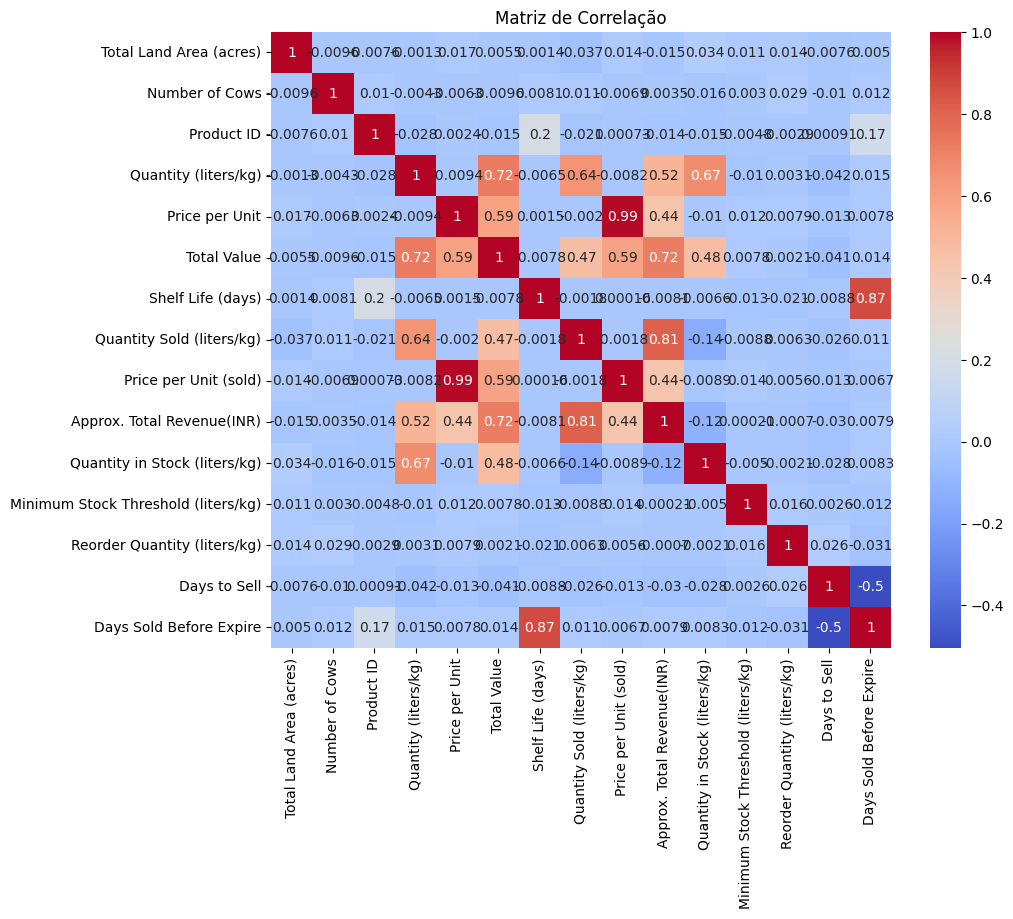

C:\Users\alexa\AppData\Local\Temp\ipykernel_16208\939687422.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_true.corr()


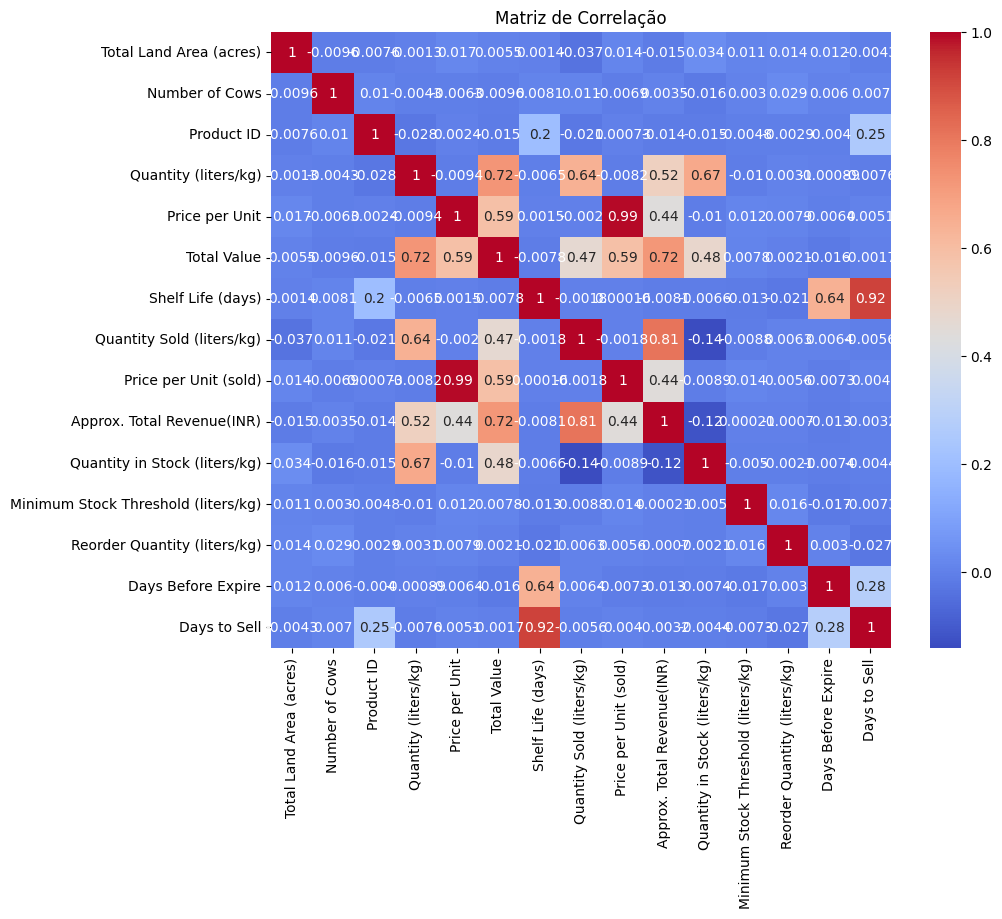

In [43]:
import matplotlib.pyplot as plt

# Matriz de correlação
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Matriz de correlação
corr = df_true.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

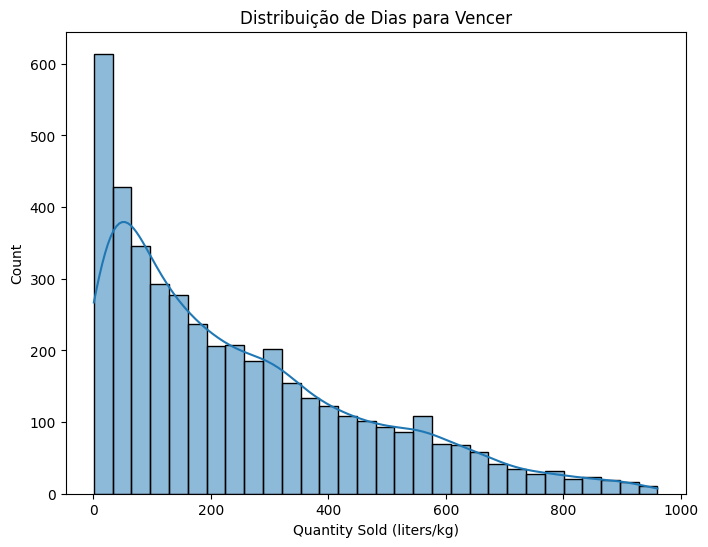

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(df_true['Quantity Sold (liters/kg)'], bins=30, kde=True)
plt.title('Distribuição de Dias para Vencer')
plt.show()

Location                               0
Total Land Area (acres)                0
Number of Cows                         0
Farm Size                              0
Date                                   0
Product ID                             0
Product Name                           0
Brand                                  0
Quantity (liters/kg)                   0
Price per Unit                         0
Total Value                            0
Shelf Life (days)                      0
Storage Condition                      0
Production Date                        0
Expiration Date                        0
Quantity Sold (liters/kg)              0
Price per Unit (sold)                  0
Approx. Total Revenue(INR)             0
Customer Location                      0
Sales Channel                          0
Quantity in Stock (liters/kg)          0
Minimum Stock Threshold (liters/kg)    0
Reorder Quantity (liters/kg)           0
Days Before Expire                     0
dtype: int64


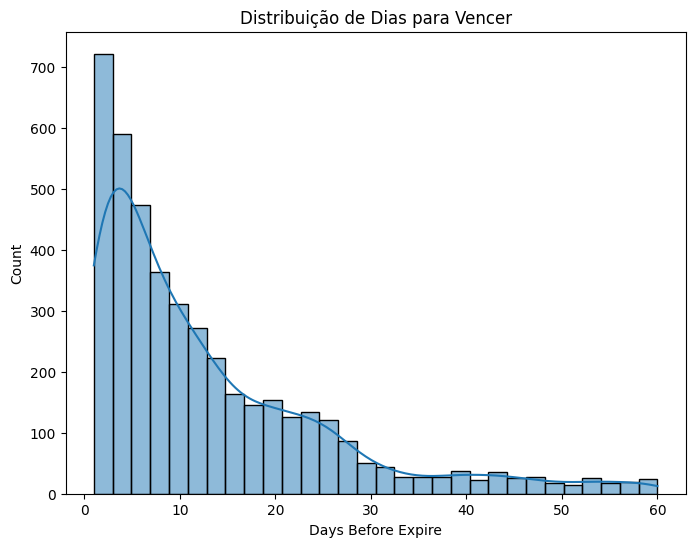

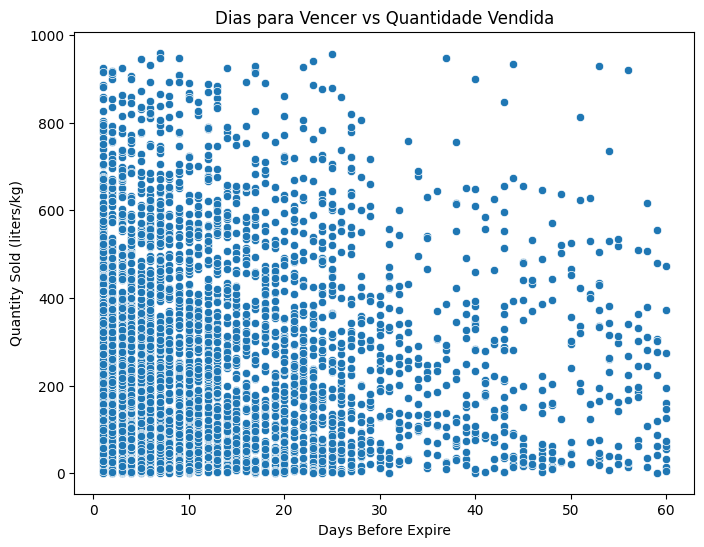

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset


# Verificar valores nulos
print(df_true.isnull().sum())

# Histograma de DaysToExpire
plt.figure(figsize=(8, 6))
sns.histplot(df_true['Days Before Expire'], bins=30, kde=True)
plt.title('Distribuição de Dias para Vencer')
plt.show()

# Gráfico de dispersão: DaysToExpire vs Quantity Sold
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Days Before Expire', y='Quantity Sold (liters/kg)', data=df_true)
plt.title('Dias para Vencer vs Quantidade Vendida')
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_true['Sales Channel'], bins=30, kde=True)
plt.title('Distribuição de Dias para Vencer')
plt.show()

In [ ]:
corr = df[['Quantity Sold (liters/kg)', 'Price per Unit (sold)', 'Approx. Total Revenue(INR)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
df_true.describe()

In [ ]:
df_true.corr()

### MACHINE TEST


In [ ]:
df_true.head()

In [ ]:
df_true['Date'] = pd.to_datetime(df_true['Date'])
df_true['Production Date'] = pd.to_datetime(df_true['Production Date'])
df_true['Expiration Date'] = pd.to_datetime(df_true['Expiration Date'])

In [ ]:
df_true.info()

In [ ]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit

# Criar variável temporal (ex: dias desde a primeira data)
df_true['Days_Since_Start'] = (df_true['Production Date'] - df_true['Production Date'].min()).dt.days

# Dividir por tempo (ex: 80% treino, 20% teste)
split_idx = int(0.8 * len(df_true))
train = df_true.iloc[:split_idx]
test = df_true.iloc[split_idx:]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Features e target
features = ['Product ID', 'Shelf Life (days)', 'Quantity Sold (liters/kg)', 
            'Price per Unit (sold)', 'Storage Condition', 'Sales Channel', 'Days_Since_Start',
            'Location']
target_stock = 'Quantity in Stock (liters/kg)'

# Transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Product ID', 'Storage Condition', 
                                  'Sales Channel', 'Location'])
    ],
    remainder='passthrough'
)

X_train = preprocessor.fit_transform(train[features])
y_train = train[target_stock]

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

model_stock = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
model_stock.fit(X_train, y_train)

# Previsão no teste
X_test = preprocessor.transform(test[features])
y_pred = model_stock.predict(X_test)

print(f"MAE: {mean_absolute_error(test[target_stock], y_pred)}")

In [ ]:
target_expiry = 'Days Before Expire'

# Usar as mesmas features + datas de produção
X_train_exp = train[features + ['Production Date']]
y_train_exp = train[target_expiry]

In [ ]:
%pip install prophet

In [ ]:
from prophet import Prophet

# Preparar dados para Prophet (requer colunas 'ds' e 'y')
prophet_data = train[['Production Date', target_expiry]].rename(
    columns={'Production Date': 'ds', target_expiry: 'y'}
)

model_expiry = Prophet()
model_expiry.fit(prophet_data)

# Criar datas futuras para simulação
future = model_expiry.make_future_dataframe(periods=len(test))
forecast = model_expiry.predict(future)

# Comparar com teste
forecasted_values = forecast.tail(len(test))['yhat']
print(f"MAE Validade: {mean_absolute_error(test[target_expiry], forecasted_values)}")

In [ ]:
def inventory_recommendation(row):
    if row['Predicted_Stock'] < row['Minimum Stock Threshold (liters/kg)']: #df_true['Production Date'].min()
        return "Reabastecer Urgente"
    elif row['Predicted_Expiry_Days'] < 7:
        return "Promoção para Expiração"
    else:
        return "Estoque OK"

# Aplicar no DataFrame de teste
test['Predicted_Stock'] = y_pred
test['Predicted_Expiry_Days'] = forecasted_values.values
test['Recomendação'] = test.apply(inventory_recommendation, axis=1)

In [ ]:
# Calcular acurácia das recomendações (ex: % de vezes que "Reabastecer Urgente" evitou falta)
stock_accuracy = 1 - (test[test['Recomendação'] == "Reabastecer Urgente"]['Quantity in Stock (liters/kg)'] 
                      < test['Minimum Stock Threshold (liters/kg)']).mean()

print(f"Acurácia de Reabastecimento: {stock_accuracy * 100:.2f}%")

In [ ]:
test

#### Teste

In [1]:
import pandas as pd

df = pd.read_csv('data/dados.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
df_teste = df.copy()
df_teste['Soma Q'] = df_teste['Quantity Sold (liters/kg)'] + df_teste['Quantity in Stock (liters/kg)']

In [4]:
df_teste[['Date', 'Quantity Sold (liters/kg)', 'Quantity (liters/kg)', 'Quantity in Stock (liters/kg)', 'Soma Q']].head(10)

,Date,Quantity Sold (liters/kg),Quantity (liters/kg),Quantity in Stock (liters/kg),Soma Q
0,2022-01-11,7,222.40,215,222
1,2021-10-12,558,687.48,129,687
2,2022-02-03,256,503.48,247,503
3,2019-07-01,601,823.36,222,823
4,2020-10-17,145,147.77,2,147
5,2019-01-04,74,593.92,519,593
6,2022-07-15,410,757.14,347,757
7,2019-01-16,15,203.36,188,203
8,2020-06-08,860,949.12,89,949
9,2022-02-05,108,385.64,277,385
